In [1]:
%matplotlib inline

from functions_SIS_SIR_logistic_regression import *
from functions_EKF_logistic_regression import *

# Generate data

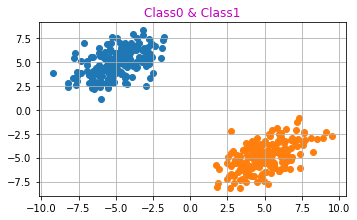

In [2]:
center = 5
num_sample = 200
class0_x, class1_x, inputs_shuffled, targets_shuffled = generate_two_class_data(center,num_sample)

In [3]:
z0 = 2
z1 = 1

# Parameters for Extended Kalman Filter (EKF)

In [4]:
# Initial process state 
#theta_n1_n1 = np.array([[z0],[z1]])
theta_n1_n1 = np.random.randn(2,1) 

# Initial process covariance 
P_n1_n1 =  0.01*np.identity(2) #larger value gives faster convergence

# Initial process noise
Q = 0.01*np.eye(2)

#Initial measurement noise
R = np.cov(targets_shuffled) ## std

# Parameters for SIS and SIR

In [5]:
T = 2*num_sample
L = 300

Q = Q
R_std = np.std(targets_shuffled)

z_init = [z0,z1]


# Run EKF

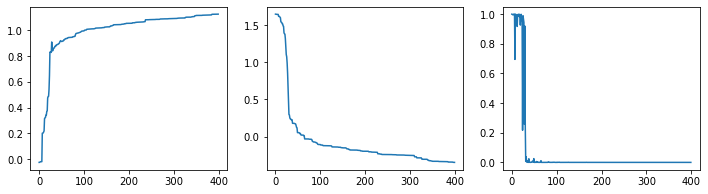

In [6]:
EKF = extended_kalman_filter(inputs_shuffled,targets_shuffled,theta_n1_n1,P_n1_n1,Q,R)
EKF.train()

z_EKF = np.zeros((400, 2))
theta0_list = EKF.theta0_list
theta1_list = EKF.theta1_list

for i in range(len(theta0_list)):
    z_EKF[i][0] = theta0_list[i]
    z_EKF[i][1] = theta1_list[i]

losses = EKF.error

EKF.plot()

# Run Sequantial Importance Sampling (SIS)

100% |########################################################################|


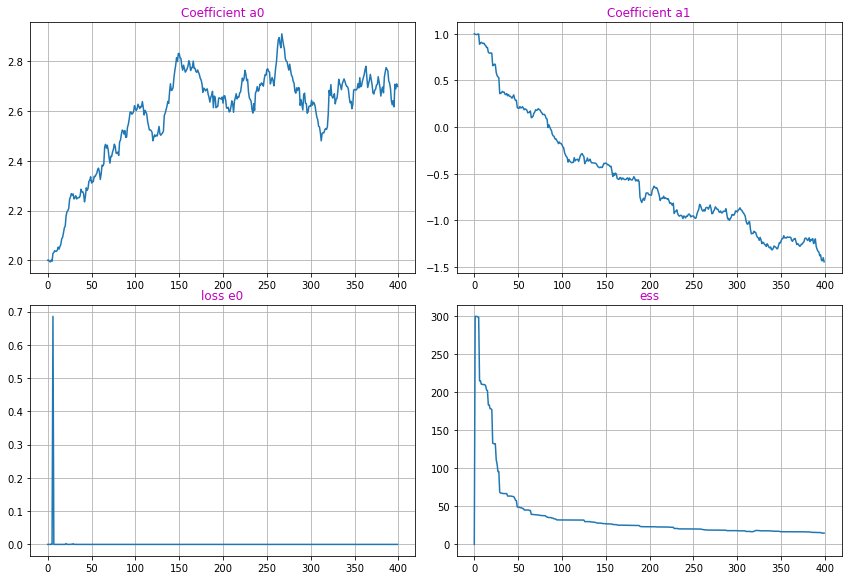

In [7]:
SIS = SIR_logistic_regression(inputs_shuffled,targets_shuffled, T, L, Q, R_std, z_init)
SIS.train()
SIS.predict()

z_SIS = SIS.z

SIS.calculate_loss()
SIS.plot()

# Run Sequential Importance Resampling (SIR), also known as Particle Filter

100% |########################################################################|


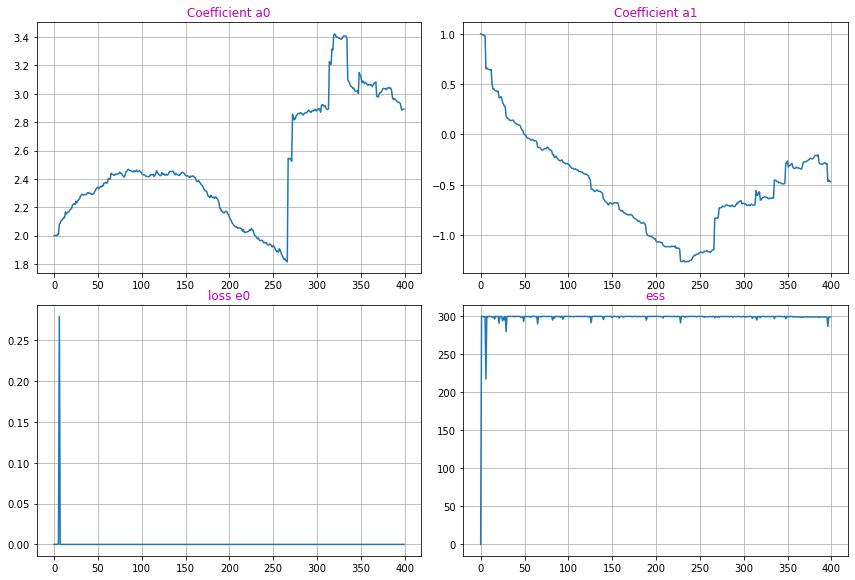

In [8]:
SIR = SIR_logistic_regression(inputs_shuffled,targets_shuffled, T, L, Q, R_std, z_init)
SIR.train(resample=True)
SIR.predict()

z_SIR = SIR.z

SIR.calculate_loss()
SIR.plot()

# Plot decision boundaries for SIS, SIR, EKF

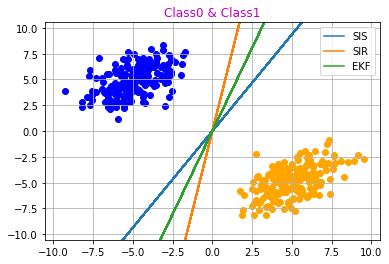

In [9]:
titles = ['SIS','SIR','EKF']
z = [z_SIS,z_SIR,z_EKF]
plot_final_decision_boundary_all(inputs_shuffled, z, class0_x, class1_x,titles)

# Generate animation 

In [10]:
algorithm_to_capture = z[1] #SIR

camera = animationlg(inputs_shuffled, algorithm_to_capture, class0_x, class1_x, center)
anim = camera.animate()
HTML(anim.to_html5_video())

In [11]:
anim.save('animation_SIR_decision_boundary.mp4') 

In [12]:
clip = VideoFileClip('animation_SIR_decision_boundary.mp4')
   
final = clip.fx( vfx.speedx, 10)

#final.ipython_display()
final.write_videofile("fast_animation_SIR_decision_boundary.mp4",fps=25) 

t:   0%|                                                                             | 0/200 [00:00<?, ?it/s, now=None]

Moviepy - Building video fast_animation_SIR_decision_boundary.mp4.
Moviepy - Writing video fast_animation_SIR_decision_boundary.mp4



Moviepy - Done !
Moviepy - video ready fast_animation_SIR_decision_boundary.mp4


# Weights of all samples in each training iteration for SIR

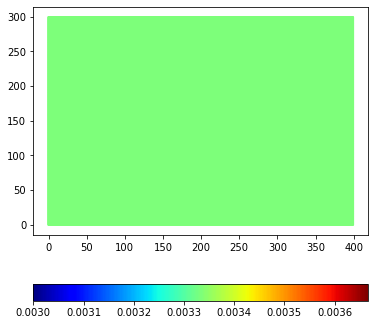

In [13]:
SIR_w = SIR.ws

samples = []
weights = []
timesteps = []

for n in range(len(SIR_w)):
    for s in range(len(SIR_w[n])):
        if SIR_w[n][s] >= 1/L:
            weights.append(SIR_w[n][s])
            samples.append(s)
            timesteps.append(n)
SIR.ws.shape

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

sc = plt.scatter(timesteps,samples, s = 2, c=weights, cmap=plt.cm.jet)

cbar = fig.colorbar(sc, orientation='horizontal')    

plt.show()